In [1]:
import random
import json
import os

import pandas as pd
import numpy as np

import run_analysis

rms_deviation: 2.03696213994985
std_difference: 2.033004114501843


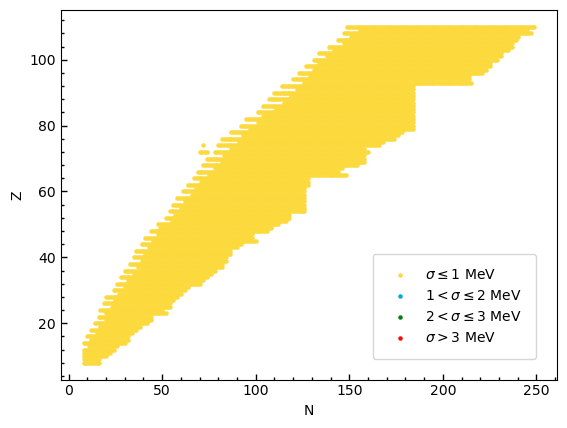

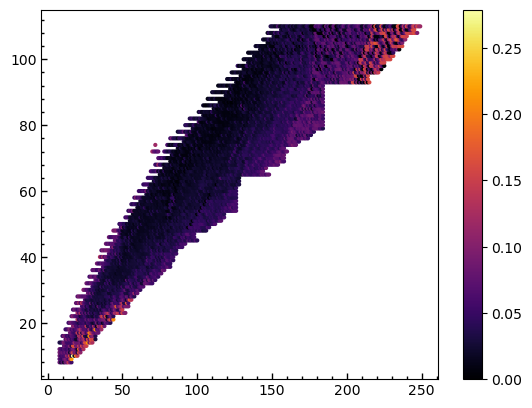

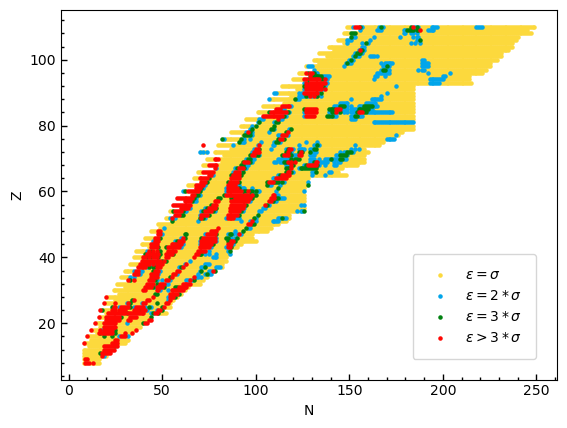

In [2]:
result = ["EXT 24 run, code: 647", "EXT 24 run, code: 1200", "EXT 24 run, code: 10417"]
dir = "data/output/"

run_analysis.main(dir + result[2] + ".dat")

In [3]:
file = dir + result[0] + ".dat"
ds = pd.read_csv(file, sep=";")

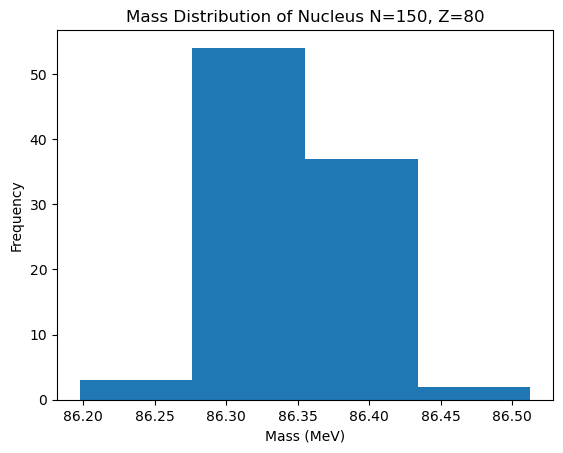

In [ ]:
run_analysis.plot_histogram_nucleus(150, 80, ds, resolution=0.08)